To test other modalities of ENIGMA toolbox (i.e., BigBrain, cytoarchitectonic classes, and connectivity data)


https://matheguru.com/stochastik/effektstarke.html

In [1]:
import os
import enigmatoolbox
import numpy as np
import pandas as pd

from scipy.stats.mstats import spearmanr, pearsonr
from statsmodels.stats.multitest import fdrcorrection

In [2]:
# Import tmaps, ordered as in original AHBA
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\data\tmaps\entrez_compatible')
CT = pd.read_csv('T_lhrh_thickness_term-preterm.csv')
GYR = pd.read_csv('T_lhrh_gyrification_term-preterm.csv')
CT.head()

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness
0,-0.051,0.042,0.059,0.042,-0.065,-0.027,-0.079,-0.027,-0.123,-0.023,...,-0.025,0.066,0.023,-0.067,-0.016,-0.063,-0.127,-0.234,0.011,-0.034


In [3]:
# Import gene expression data, ordered as in original AHBA
os.chdir(r'C:\Users\Acer\Documents\Studium\PhD\01_MA_preterm_gene-expression\analysis\data\microarray')
genes = pd.read_csv('expression_brainorder.csv', index_col=0).T
reglabels = list(genes.index)
genelabels = list(genes.columns)
print("Your input gene list contains expression data for", len(genelabels), "across", len(reglabels), "regions...")
genes.head()

Your input gene list contains expression data for 15633 across 68 regions...


gene_symbol,A1BG,A1BG-AS1,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
L_bankssts,0.440726,0.589278,0.381510,0.436797,0.467330,0.483065,0.452128,0.543946,0.536256,0.588966,...,0.486024,0.533246,0.522263,0.601487,0.587398,0.405509,0.634875,0.497207,0.666547,0.477138
L_caudalanteriorcingulate,0.678336,0.431307,0.572806,0.671694,0.480824,0.503408,0.355954,0.368647,0.556326,0.584441,...,0.387346,0.363805,0.343892,0.549072,0.387021,0.633337,0.349052,0.223801,0.406646,0.503784
L_caudalmiddlefrontal,0.520608,0.446375,0.609580,0.459314,0.501768,0.542337,0.516451,0.527325,0.416930,0.433428,...,0.486235,0.506752,0.408213,0.448193,0.453520,0.438250,0.429106,0.587044,0.404144,0.529791
L_cuneus,0.317040,0.307230,0.451889,0.477776,0.474542,0.471519,0.687771,0.399432,0.566165,0.440505,...,0.590275,0.526024,0.370078,0.550802,0.423469,0.451572,0.444684,0.829026,0.733465,0.387726
L_entorhinal,0.711983,0.261514,0.699565,0.514992,0.455938,0.476981,0.313874,0.296195,0.600913,0.489880,...,0.368767,0.372662,0.779778,0.435531,0.376815,0.562862,0.542200,0.085269,0.453389,0.591145


In [9]:
# convert to numpy array
genes_np = genes.to_numpy()
CT_np = CT.to_numpy()
CT_np = np.squeeze(CT_np)
GYR_np = GYR.to_numpy()
GYR_np = np.squeeze(GYR_np)

array([-0.145,  0.052,  0.063,  0.211,  0.048, -0.015,  0.051,  0.049,
       -0.008,  0.077,  0.087, -0.042,  0.044, -0.1  ,  0.014,  0.094,
       -0.151,  0.1  ,  0.08 ,  0.088,  0.126,  0.044,  0.119,  0.16 ,
        0.056,  0.057,  0.037,  0.074, -0.109,  0.089,  0.105, -0.022,
       -0.202, -0.111,  0.128,  0.066,  0.234,  0.132,  0.141,  0.04 ,
        0.157,  0.111,  0.075,  0.083,  0.06 ,  0.12 ,  0.12 ,  0.062,
        0.022,  0.019,  0.096,  0.129,  0.106,  0.164,  0.087,  0.034,
        0.143,  0.205,  0.104,  0.139,  0.077, -0.016,  0.083,  0.106,
        0.134,  0.185,  0.065,  0.108])

# BigBrain

In [12]:
# use Cohen's d instead of t-statistic: d=t/sqrt(n)
CT_d = CT/np.sqrt(200)
CT_d

,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,lh_isthmuscingulate_thickness,lh_lateraloccipital_thickness,...,rh_rostralanteriorcingulate_thickness,rh_rostralmiddlefrontal_thickness,rh_superiorfrontal_thickness,rh_superiorparietal_thickness,rh_superiortemporal_thickness,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness
0,-0.003606,0.00297,0.004172,0.00297,-0.004596,-0.001909,-0.005586,-0.001909,-0.008697,-0.001626,...,-0.001768,0.004667,0.001626,-0.004738,-0.001131,-0.004455,-0.00898,-0.016546,0.000778,-0.002404


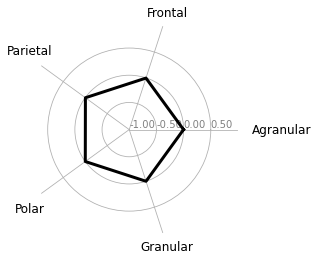

In [13]:
from enigmatoolbox.histology import economo_koskinas_spider

# Stratify cortical atrophy based on Economo-Koskinas classes
class_mean = economo_koskinas_spider(CT_d, axis_range=(-1, 1))